## Load data using pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('iris_train.csv')
print(data.shape)

(120, 5)


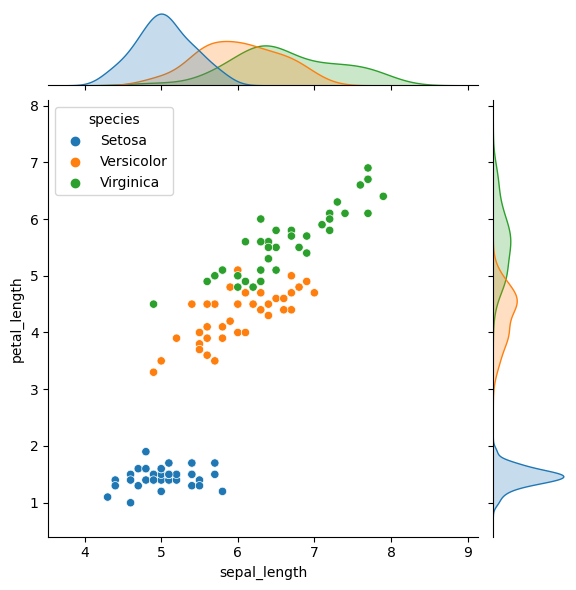

In [2]:
sns.jointplot(x="sepal_length", y="petal_length", 
              data=data, hue="species")
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

train_data = pd.read_csv('iris_train.csv')
print(train_data.shape)
train_data.head()

(120, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
train_data = train_data.sample(frac = 1)
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,Setosa
117,6.4,3.1,5.5,1.8,Virginica
112,6.4,2.8,5.6,2.2,Virginica
104,6.7,3.3,5.7,2.1,Virginica
31,5.4,3.4,1.5,0.4,Setosa


In [5]:
train_data['species'] = pd.Categorical(train_data['species']).codes
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,0
117,6.4,3.1,5.5,1.8,2
112,6.4,2.8,5.6,2.2,2
104,6.7,3.3,5.7,2.1,2
31,5.4,3.4,1.5,0.4,0


In [6]:
# test data
test_data = pd.read_csv('iris_test.csv')
print(test_data.shape)
test_data.head()

(30, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.5,1.3,0.3,Setosa
1,4.5,2.3,1.3,0.3,Setosa
2,4.4,3.2,1.3,0.2,Setosa
3,5.0,3.5,1.6,0.6,Setosa
4,5.1,3.8,1.9,0.4,Setosa


In [7]:
test_data['species'] = pd.Categorical(test_data['species']).codes
test_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.5,1.3,0.3,0
1,4.5,2.3,1.3,0.3,0
2,4.4,3.2,1.3,0.2,0
3,5.0,3.5,1.6,0.6,0
4,5.1,3.8,1.9,0.4,0


## Preprocess data

In [8]:
x_train = train_data[['sepal_length', 'petal_length']].to_numpy()
x_train = x_train.reshape(120, 2)
print(x_train.shape)

y_train = train_data['species'].to_numpy()
y_train = y_train.astype('uint8')
print(y_train.shape)

(120, 2)
(120,)


In [9]:
from sklearn import preprocessing

mean = x_train.mean()
std = x_train.std()
x_train = (x_train - mean) / std

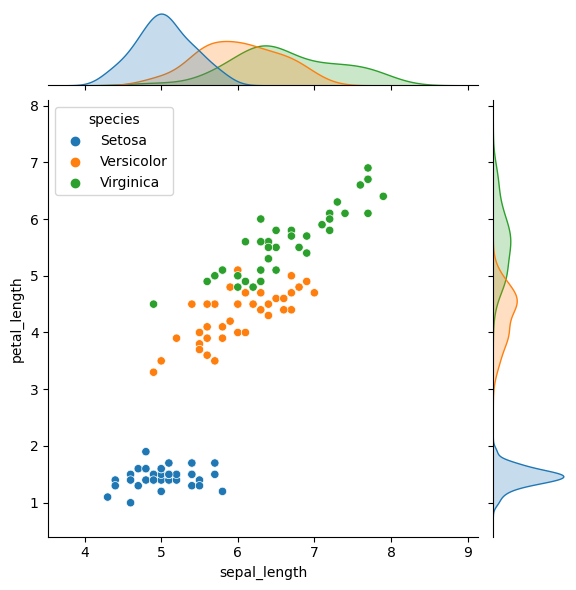

In [10]:
sns.jointplot(x="sepal_length", y="petal_length", 
                     data=data, hue="species")
plt.show()

In [11]:
N = 40 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1,K))

# gradient descent loop
num_examples = x_train.shape[0]
learning_rate = 0.05

losses = []
for i in range(2000):  
    # evaluate class scores
    scores = np.dot(x_train, W) + b 

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y_train])
    loss = np.sum(corect_logprobs)/num_examples
    if i % 5 == 0:
        #print("iteration %d: loss %f" % (i, loss))
        losses.append(loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y_train] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(x_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    # perform a parameter update
    W += -learning_rate * dW
    b += -learning_rate * db

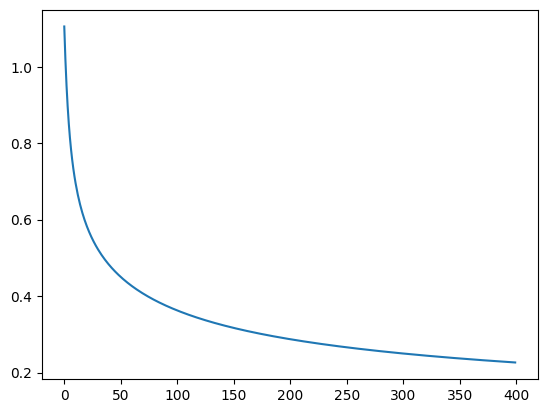

In [12]:
plt.plot(losses)

In [13]:
# evaluate training set accuracy
scores = np.dot(x_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y_train)))

Training accuracy: 0.93


In [14]:
x_test = test_data[['sepal_length', 'petal_length']].to_numpy()
x_test = x_test.reshape(30, 2)
print(x_test.shape)

y_test = test_data['species'].to_numpy()
y_test = y_test.astype('uint8')
print(y_test.shape)

(30, 2)
(30,)


In [15]:
x_test = (x_test - mean) / std

In [16]:
# evaluate training set accuracy
scores = np.dot(x_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test accuracy: %.2f' % (np.mean(predicted_class == y_test)))

Test accuracy: 0.97
